**Imports and Defines**

In [15]:

import matplotlib.pyplot as plt
import math

def getDist(v1, v2, i):
    return math.sqrt( (v1[0][i]-v2[0][i])**2 + (v1[1][i]-v2[1][i])**2 + (v1[2][i]-v2[2][i])**2)

def getDir(v1, v2, i):
    return [v1[0][i]-v2[0][i], v1[1][i]-v2[1][i] , v1[2][i]-v2[2][i]]

G = 6.67* 10**-11
t_max = 1 # yr
dt = 0.001 # yrs

**Data Import** 

In [16]:
# Lisa
filename = "control10d"
with open("./plots/" + filename + ".csv") as file:
    data = file.readlines()
    data_list = []
    pos = [[[],[],[]],[[],[],[]],[[],[],[]]] # pos[n][x_i][~t]
    for i in range(len(data)):
        data_list.append(data[i].strip("\n").split(","))
    for i in range(len(data_list)):
        for j in range(len(data_list[i])):
            pos[j//3][j%3].append(float(data_list[i][j]))

In [ ]:
# Asteroid
filename = ""
with open("./plots/" + filename + ".csv") as file:
    m_ast = float(file.readline().strip("\n"))
    data = file.readlines()
    data_list = []
    pos_ast = [[],[],[]] # pos[x_i][~t]
    for i in range(len(data)):
        data_list.append(data[i].strip("\n").split(","))
    for i in range(len(data_list)):
        for j in range(len(data_list[i])):
            pos_ast[j%3].append(float(data_list[i][j]))

**LISA Orbit Plot**

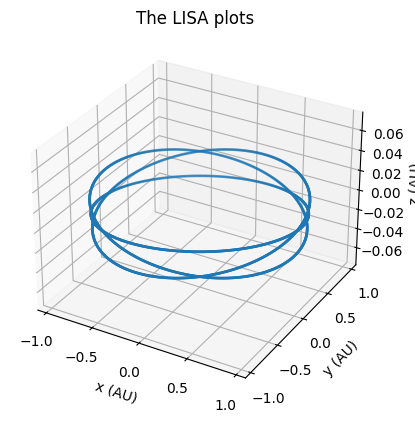

In [18]:
ax = plt.figure().add_subplot(111, projection='3d')
ax.scatter(pos[0][0] + pos[1][0] + pos[2][0]
          ,pos[0][1] + pos[1][1] + pos[2][1]
          ,pos[0][2] + pos[1][2] + pos[2][2], s=1)
ax.set_xlabel('x (AU)')
ax.set_ylabel('y (AU)')
ax.set_zlabel('z (AU)')
ax.set_xlim3d(-1.05,1.05)
ax.set_ylim3d(-1.05,1.05)

# ax.set_zlim3d(-0.5, 0.5) # zoom out
ax.set_zlim3d(-0.075, 0.075) # zoom in
plt.title('The LISA plots')
plt.show()

**Satellite Separation**

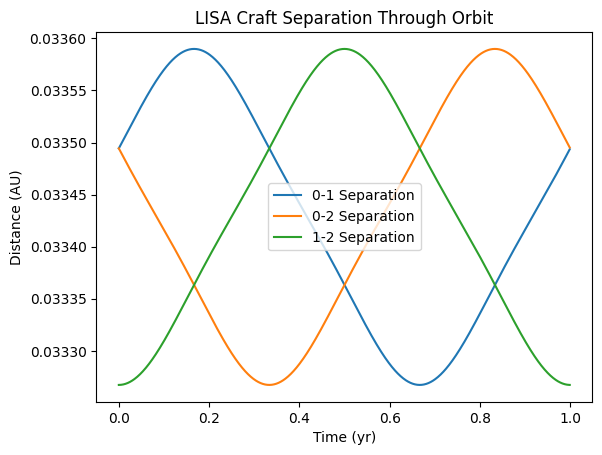

In [19]:
posDiff = [[],[],[],[]] # t, 01, 02, 12
t_max = 1 # yr
dt = 0.001 # yrs
# dt = 1/365/24/3600 # 1 sec in yrs
for i in range(len(pos[0][0])):
    posDiff[0].append(i*dt)
    posDiff[1].append(getDist(pos[0],pos[1],i))
    posDiff[2].append(getDist(pos[0],pos[2],i))
    posDiff[3].append(getDist(pos[1],pos[2],i))
plt.plot(posDiff[0], posDiff[1], label = "0-1 Separation")
plt.plot(posDiff[0], posDiff[2], label = "0-2 Separation")
plt.plot(posDiff[0], posDiff[3], label = "1-2 Separation")
plt.title("LISA Craft Separation Through Orbit")
plt.xlabel("Time (yr)")
plt.ylabel("Distance (AU)")
plt.legend()
plt.show()

**Acceleration From Asteroid**

In [20]:
accel = [[],[],[]] # [n]
for n in range(len(pos)):
    for i in range(min(len(pos[n]),len(pos_ast))):
        a = G* m_ast/getDist(pos[n], pos_ast, i)**2
        accel[n].append(a)
accel_ave = []
for i in range(accel[0]):
    accel_ave.append((accel[0]+accel[1]))

NameError: name 'pos_ast' is not defined